## 추천시스템 개요 Cos_U

### # 개발시 유의점 

1. 중복된 키값으로 추천을 받을 때 에러
- ex) 연인 (1992 작), 연인 (2002 작) . 다른영화가 같은 키값으로 들어올때

    recommand 함수가 영화를 특정하지 못해 에러가 발생. 그러나 두 영화에 임의로 레이블을 달아서 구분한다면. 다른 중복처리 또한 일반화가 안되는 문제. 그렇다고 중복데이터를 제거하기에는 두 영화 모두 가치가 있을때. 고민점.

2. 필수코드. get_recommendation : 출처는 Ckworld ML ch07.추천시스템에서 도서추천때 개발된 코드이니 확인하시면 좋습니다.
    - 핵심은 키(제목)값과 index 처리 이며. 제목을 인풋으로 넣고 인덱스를 돌려받아. 해당 인덱스를 가진 영화를 5개 보여주는 방식입니다.

In [112]:
#########

# from sklearn.metrics.pairwise import cosine_similarity

# def get_recommendation(title, cos_sim=cos_sim):
#     index = indices[title]
#     sim_scores = pd.Series(cos_sim[index])
#     movie_indices = sim_scores.sort_values(ascending=False).head(6).tail(5).index
#     result = df_for_title.title.iloc[movie_indices]
#     return result

#########

# 헤드6 취하고. 다시 tail5 취하면 유사도1인 자기자신을 제거합니다.
# 인덱스를 스코어로 받으므로, 점수는 순서만 중요할뿐 score의 의미는 없습니다. 1등만 기억하는 더?
# result는  .iloc[인덱스]  이므로 해당하는 인덱스를 넣어 키값을 가져오는 형태이다. 
# cf. loc[행, 열] , iloc[행, 열] 이나,  iloc[] 는 정수값만 허용하므로, loc[: , 'name']  전체행. name 컬럼. 으로 밝혀쓰는게 읽기좋다. 

In [113]:
# #########

# # 영화이름을 치면 인덱스를 반환
# def get_index(title, df=df_for_title):
#     index = df_for_title.index[(df_for_title['title'] == title)].to_list()
#     return index  

# ######### 

In [114]:
# #########

# # 인덱스를 치면 영화제목 및 시놉시스를 반환
# def get_title(index, df=df_for_title):
#     title = df_for_title['title'][(df_for_title.index == index)], df_for_title['시놉시스'][index]
#     return title

# #########

### - Installation

In [115]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 단계별 필요 라이브러리를 알 수 있도록 주석처리함. 

# import missingno as msno
# from sklearn.feature_extraction.text import TfidfVectorizer
# from IPython.display import Image
# from sklearn.metrics.pairwise import cosine_similarity  #코사인유사도. pariwise는 쌍대비교 (두개체가 동일한지, 얼마나 유사한지를 판단)

In [116]:
# 데이터 경로는 각자환경에 맞게. # np_values='NaN'을 사용할 것.
df_temp = pd.read_excel("C:/Users/jlune/carbon/project_JI/0.Model/data/wavve_total.xlsx", 
na_values='NaN')

In [117]:
df_temp.head(), len(df_temp), df_temp.columns

(   Unnamed: 0  Unnamed: 0.1              제목     개봉일                평점  \
 0           0             0  반지의 제왕: 반지 원정대  (2001)     95%  8.9 (1m)   
 1           1             1            남색대문  (2002)     79%  7.3 (3k)   
 2           2             2       멀홀랜드 드라이브  (2001)   86%  7.9 (344k)   
 3           3             3   해리 포터와 마법사의 돌  (2001)   87%  7.6 (743k)   
 4           4             4           펄프 픽션  (1994)     95%  8.9 (1m)   
 
                            장르     재생시간                  감독  \
 0              판타지 , 액션 , 드라마  2시간 59분       Peter Jackson   
 1  드라마 , 로맨스 , Made in Europe  1시간 25분        Yee Chin-Yen   
 2  스릴러 , 드라마 , Made in Europe  2시간 27분         David Lynch   
 3               판타지 , 가족 , 액션  2시간 32분      Chris Columbus   
 4              스릴러 , 범죄 , 드라마  2시간 34분   Quentin Tarantino   
 
                                                  출연진  \
 0  Elijah Wood,Ian McKellen,Liv Tyler,Viggo Morte...   
 1  Gwei Lun-mei,Chen Bolin,Liang Yolin,Chau Ching...   
 2 

In [118]:
# 개봉년도 기준 sorting
# index 초기화 및 필요컬럼 추출
df_temp.sort_values(by='개봉일', ascending=False, inplace=True)
df_temp.reset_index(inplace=True)
df_temp = df_temp.loc[:,'제목':'시놉시스']

In [119]:
df_temp.head(5)

제목     개봉일               평점             장르     재생시간  \
0                    싱어송  (2022)              NaN            드라마  1시간 42분   
1                     특송  (2022)         71%  6.9  액션 , 범죄 , 스릴러  1시간 49분   
2        더 테러 라이브 인 하이스쿨  (2022)         46%  4.3       공포 , 스릴러  1시간 28분   
3                    셰터드  (2022)         64%  5.0            스릴러  1시간 32분   
4  해리 포터 20주년: 리턴 투 호그와트  (2022)   89%  8.0 (34k)     다큐멘터리 , 가족  1시간 43분   

                                                  감독  \
0                                          Na O-heon   
1                                       Park Dae-min   
2                                       Lee Ann Kurr   
3                                        Luis Prieto   
4   Eran Creevy ,  Joe Pearlman ,  Casey Patterso...   

                                                 출연진  \
0              Heo Ga-yoon,Yoo Young-jae,Moon Ji Hoo   
1  Park So-dam,Kim Eui-sung,Song Sae-byuk,Yeom Hy...   
2  Montse Hernandez,Cheyenne Haynes,Anthony Keyva...   
3  Cameron Monaghan,Lilly Krug,Frank Grillo,Sasha...   
4  Daniel Radcliffe,Rupert Grint,Emma Watson,Bonn...   

                                                시놉시스  
0  노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...  
1  예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...  
2  어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...  
3  외딴 집에 사는 부유한 그는 완벽한 미모의 섹시한 그녀를 만나고 격정적인 밤을 보낸...  
4  ‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트...

- df 작성 및 전처리 part

In [120]:
# !pip install missingno

AxesSubplot(0.125,0.125;0.698618x0.755)
Index(['제목', '개봉일', '평점', '장르', '재생시간', '감독', '출연진', '시놉시스'], dtype='object')


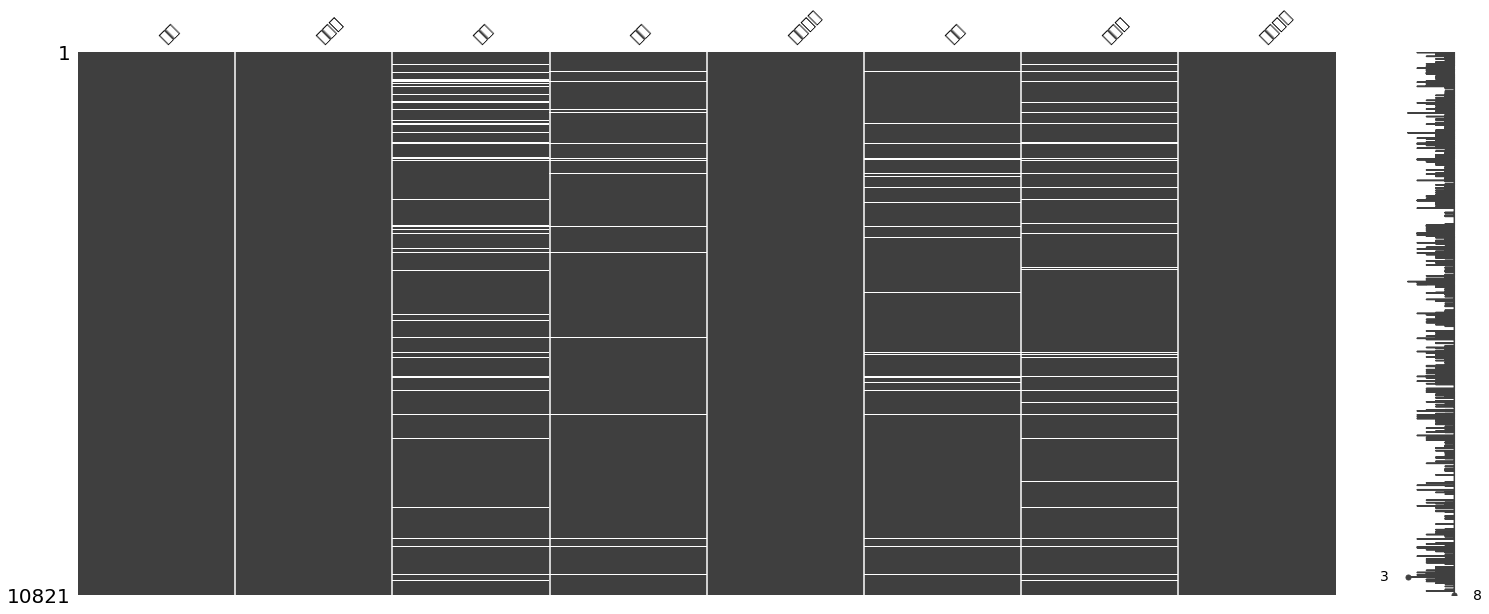

In [121]:
# 결측치를 시각적 표현으로 돌려줌. 컬럼네임을 영어로 할것.
import missingno as msno
print(msno.matrix(df_temp))
print(df_temp.columns)

In [122]:
# 중복값확인 = 0
df_temp.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10816    False
10817    False
10818    False
10819    False
10820    False
Length: 10821, dtype: bool

In [123]:
# 결측치 확인 다수 있으나, 중요 피쳐 아니야. 
df_temp.isnull().sum(), len(df_temp)

(제목        0
 개봉일       0
 평점      632
 장르      197
 재생시간      0
 감독      401
 출연진     518
 시놉시스     28
 dtype: int64,
 10821)

In [124]:
# 확인 후 df작성.
df = df_temp.copy()
df.head(3)

제목     개봉일         평점             장르     재생시간             감독  \
0              싱어송  (2022)        NaN            드라마  1시간 42분      Na O-heon   
1               특송  (2022)   71%  6.9  액션 , 범죄 , 스릴러  1시간 49분   Park Dae-min   
2  더 테러 라이브 인 하이스쿨  (2022)   46%  4.3       공포 , 스릴러  1시간 28분   Lee Ann Kurr   

                                                 출연진  \
0              Heo Ga-yoon,Yoo Young-jae,Moon Ji Hoo   
1  Park So-dam,Kim Eui-sung,Song Sae-byuk,Yeom Hy...   
2  Montse Hernandez,Cheyenne Haynes,Anthony Keyva...   

                                                시놉시스  
0  노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...  
1  예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...  
2  어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10821 entries, 0 to 10820
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      10821 non-null  object
 1   개봉일     10821 non-null  object
 2   평점      10189 non-null  object
 3   장르      10624 non-null  object
 4   재생시간    10821 non-null  object
 5   감독      10420 non-null  object
 6   출연진     10303 non-null  object
 7   시놉시스    10793 non-null  object
dtypes: object(8)
memory usage: 676.4+ KB


In [126]:
## df[조건식] #na=False 옵션은 조건은 트루 폴스로 비교할때 na 값이 들어가 오류가 나기에 그것을 무시하라는 의미
## 10821개의 데이터중 액션은 3288개. 장르 
df[df['장르'].str.contains('액션', na=False)].count(axis=0)

제목      3288
개봉일     3288
평점      3218
장르      3288
재생시간    3288
감독      3199
출연진     3223
시놉시스    3284
dtype: int64

In [127]:
# 장르 번호 부여 용 dict 셋팅 
idx = {'1':'액션', '2':'애니메이션', '3':'코미디', '4':'범죄',
       '5':'다큐멘터리', '6':'드라마', '7':'판타지', '8':'역사',
       '9':'공포', '10':'가족', '11':'음악', '12':'스릴러',
       '13':'로맨스', '14':'SF', '15':'스포츠', '16':'전쟁',
       '17':'서부', '18':'Reality TV', '19':'Made in Europe'}

In [128]:
# 장르별 영화 분포를 보고자 시리즈 셋팅.
s = []
for i in idx:
    gene = len(df[df['장르'].str.contains(idx[i], na=False)])
    s.append(gene)
    # print(gene)
# g1 = len(df[df['장르'].str.contains('액션')])
# idx["1"]
print(s, len(s),'개 장르') 

[3288, 829, 3040, 1756, 651, 5598, 1459, 494, 1822, 880, 318, 3486, 2037, 1328, 218, 474, 114, 6, 1618] 19 개 장르


In [129]:
df_g = pd.DataFrame(list(idx.items()),
        columns=['Category_id', 'genre'],
        index=None)
df_g['Count_jenre'] = s  # 장르 개수 카운트한 컬럼 합치기
df_g

# 드라마와 스릴러 코미디 로맨스 가 4대 장르인데. 장르별 추천은 완성못했으므로 추후 가중치를 달리 쓸 수 있을지 고민거리로.

Category_id           genre  Count_jenre
0            1              액션         3288
1            2           애니메이션          829
2            3             코미디         3040
3            4              범죄         1756
4            5           다큐멘터리          651
5            6             드라마         5598
6            7             판타지         1459
7            8              역사          494
8            9              공포         1822
9           10              가족          880
10          11              음악          318
11          12             스릴러         3486
12          13             로맨스         2037
13          14              SF         1328
14          15             스포츠          218
15          16              전쟁          474
16          17              서부          114
17          18      Reality TV            6
18          19  Made in Europe         1618

In [130]:
# df_syn은 모델 원을 위해 (시놉기반)
# df_info는 모델 투를 위해 (장르, 감독, 출연진, 시놉, 제목은 어떻게 하지?)
df_syn = df[['제목','시놉시스']]
df_info = df[['제목', '시놉시스', '장르', '감독', '출연진']]
# df_syn.head(5)
# df_info.head()

In [131]:
df_syn.nunique() #제목의 개수가 적은것을 보아. 같은 이름의 영화가 17개 가량 있다.

제목      10670
시놉시스    10787
dtype: int64

In [132]:
df_info.nunique() # 감독은 보통 1명인데 4000개 가량 중복된다는 걸 미루어 보아. 
                  # 원 - 투의 유사도 변화를 체킹해봐야 다음 개발을 이어갈 수 있어.

제목      10670
시놉시스    10787
장르       2932
감독       6596
출연진     10292
dtype: int64

In [133]:
# 줄거리가 없는 영화 삭제후 item개수 확인
df_syn = df_syn.dropna(subset=['시놉시스']) #시놉시스가 NaN값이면 행 삭제.
len(df_syn)

10793

## # 추천시스템 One_two

- 일반적으로 유사도를 측정하기 위해 정량화 하는 방법
    - 단순히 같은 단어의 개수를 사용하는 법
    - 형태소로 나누어 형태소를 비교하는 법
    - 자소 단위로 나누어 비교하는법 자소 : 자음하나 모음하나 단위.
    - ` `    
        
- 이 책 (자연어처리 - 앵무새) 에서는 딥러닝을 기반으로 텍스트의 유사도를 측정할 것.
    텍스트를 벡터화 (수치화) 한 후 벡터간의 유사도를 판단할것. (보충하겠음)
    
- 자주 쓰이는 4개의 유사도 측정방법은

    자카드 유사도,
    유클리디언 유사도 (걍 거리)
    맨해튼 유사도 (네모네모박스 최적 거리)
    코사인 유사도 (벡터간의 각도 비교로 유사도 판단)

### 1. 벡터화 전략은 TF-IDF (단어 빈도-역문서 빈도) 벡터화

In [134]:
# from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
# error index 관련 return self._engine.get_loc(casted_key) #drop으로 중간 인덱스를 날렸기 때문으로 추정
 # >>> index reset 으로 해결.
df_syn.reset_index(drop=True, inplace=True)
sent = []

for i in (range(0,len(df_syn))):
    content = df_syn['시놉시스'][i]
    sent.append(content)
len(sent)
# 10821개 # 10793개

10793

In [136]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(sent)

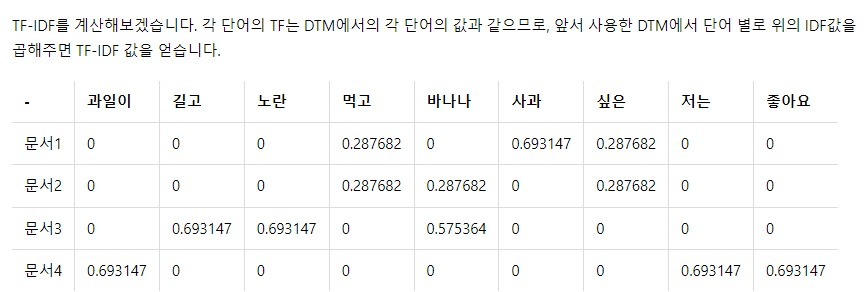

In [137]:
# !pip install IPython
from IPython.display import Image
Image('data/tfidf_matrix.jpg') #tfidf matrix 의 모습

In [138]:
print(tfidf_matrix) # 형태 보고자 할땐 프린트 해볼것.

  (0, 42151)	0.033167137837764704
  (0, 17454)	0.07148617095127045
  (0, 13704)	0.07815782926995744
  (0, 73707)	0.06556015208869413
  (0, 106017)	0.0816625365678121
  (0, 72775)	0.062123314443178604
  (0, 29095)	0.07978458495283824
  (0, 43763)	0.11193508847130022
  (0, 123444)	0.10571191899714434
  (0, 85177)	0.10571191899714434
  (0, 27718)	0.11687469597378126
  (0, 38431)	0.07695064730450336
  (0, 97668)	0.10843038117344557
  (0, 151779)	0.031033717126111037
  (0, 42410)	0.027303059613335942
  (0, 110936)	0.09998606637310986
  (0, 55864)	0.09504645887062883
  (0, 45171)	0.05917562169810395
  (0, 34639)	0.06503039162129909
  (0, 14210)	0.06659558794587718
  (0, 111798)	0.07672292906533106
  (0, 137476)	0.04934399492195877
  (0, 97663)	0.09981010659324813
  (0, 81918)	0.05116644497812904
  (0, 86516)	0.06239863850204543
  :	:
  (10791, 6518)	0.23076516970887379
  (10791, 11657)	0.27076996745700666
  (10791, 7079)	0.1523448036194325
  (10791, 3506)	0.20323537412224874
  (10791, 6862)	

In [139]:
tfidf_matrix[0].shape #(1, 160805) 희소백터의 문제 보여. sparce
# print(np.asarray(tfidf_matrix[0]))

(1, 160805)

### 2. 코사인유사도 및 검출기

In [140]:
# cos U
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim.shape, type(cos_sim)

((10793, 10793), numpy.ndarray)

In [141]:
# 제목열과 시놉시스만 가져와서 셋팅. 깔끔한 방식은 아니니 df 상황에 맞추어 고려할것.
df_for_title = df_syn.copy()
len(df_for_title)

10793

In [142]:
df_for_title.rename(columns= {'제목' : 'title'}, inplace=True)
df_for_title.head()

title                                               시놉시스
0                    싱어송  노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...
1                     특송  예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...
2        더 테러 라이브 인 하이스쿨  어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...
3                    셰터드  외딴 집에 사는 부유한 그는 완벽한 미모의 섹시한 그녀를 만나고 격정적인 밤을 보낸...
4  해리 포터 20주년: 리턴 투 호그와트  ‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트...

In [143]:
# indices = pd.Series(df.index, index=df.title)
indices = pd.Series(df_for_title.index, index=df_for_title.title)
# 코드의 의미는 df_syn의 인덱스를 시리즈로.. 요게 본체
# 신기하게 본체의 인덱스를 제목으로 사용한다. 
# 나중에 인덱스를 key로 제목을 출력하기 위함  = 신기방기 한 방법

In [144]:
indices # title 열을 인덱스로 사용. 인덱스 값을 밸류로 사용. 서로 바뀐 구조.

title
싱어송                          0
특송                           1
더 테러 라이브 인 하이스쿨              2
셰터드                          3
해리 포터 20주년: 리턴 투 호그와트        4
                         ...  
북극의 나누크                  10788
키드                       10789
The Pawnshop             10790
The Rink                 10791
The Fireman              10792
Length: 10793, dtype: int64

In [145]:
def get_recommendation(title, cos_sim=cos_sim):
    index = indices[title]
    sim_scores = pd.Series(cos_sim[index])
    movie_indices = sim_scores.sort_values(ascending=False).head(6).tail(5).index
    result = df_for_title.title.iloc[movie_indices]
    return result

In [146]:
get_recommendation('조커') # 광대

1048               클라운 돌
4065                 쇼콜라
3574            로드(Road)
3822    킹 아서 : 엑스칼리버의 부활
6632             우먼 인 블랙
Name: title, dtype: object

In [147]:
get_recommendation('부산행') # 좀비

2335     웨스트 오브 헬
4982       최후의 인류
618          최미역행
679           러브컷
10514    카산드라 크로싱
Name: title, dtype: object

In [148]:
get_recommendation('셰터드') #연관성 부족.

2450                롤링 투 유
9916                    연인
1522               애나벨 집으로
1502                  드림랜드
7978    닉과 노라의 인피니트 플레이리스트
Name: title, dtype: object

In [149]:
get_recommendation('반지의 제왕: 반지 원정대') # 판타지

9010     반지의 제왕: 두 개의 탑
1350      성기사단: 어둠의 마법사
7364            마법사의 제자
2087       잃어버린 제국을 찾아서
2170    신데렐라: 마법 반지의 비밀
Name: title, dtype: object

In [150]:
# get_recommendation('연인') ## 중복 키값으로 에러 반환 # 연인에 해당하는 영화가 2개 이상이라 영화를 특정하지 못함. 
# get_recommendation('코만도')
# get_recommendation('베스트셀러')

In [151]:
# 영화이름을 치면 인덱스를 반환
def get_index(title, df=df_for_title):
    index = df_for_title.index[(df_for_title['title'] == title)].to_list()
    return index   

In [152]:
get_index('부산행')

[4248]

In [153]:
# 인덱스를 치면 영화제목 및 시놉시스를 반환
def get_title(index, df=df_for_title):
    title = df_for_title['title'][(df_for_title.index == index)], df_for_title['시놉시스'][index]
    return title

In [154]:
get_title(8715)
# get_title(4885)

(8715    연인
 Name: title, dtype: object,
 "중국 역사상 가장 황금기였던 당나라. 그러나 서기 859년, 당 왕조는 바야흐로 쇠퇴의 길에 들어서게 된다. 무능한 왕조와 부패한 대신들로 나라 전체가 불안에 휩싸이고 온 나라에 반란군이 들끓는다. 그 중 가장 이름난 반란조직이 바로 '비도문' (House of Flying Daggers)이다. 비밀조직인 비도문은 민중에게 관에 저항할 것을 호소하고, 자유를 추구하였다. 도성 근처에 위치한 팽 티안 지방에 출몰하는 비도문은 민중들을 혼란시키고, 관의 힘을 약하게 하여 지방 관리들에게는 그야말로 눈엣가시 같은 존재이다.  비도문이 관과 싸워온지 수년이 흐르고, 우두머리가 전투에서 살해당하게 된다. 하지만 이후에도 조직은 점점 세를 얻어간다. 결국 팽 티안 성의 관리인 레오(유덕화)와 진(금성무)은 열흘 안에 이 조직의 새로운 우두머리를 잡아오라는 명을 받는다. 레오는 인근지방 홍등가에 새로 나타난 무희인 메이(장쯔이)를 의심하게 되는데, 실은 그녀는 죽은 비도문 두목의 딸이다. 레오는 메이를 데려다 심문을 하지만 입을 열지 않자 다른 수를 꾸민다. 진으로 하여금 ‘풍’이라는 떠돌이 무사로 변장을 하게 해 메이를 감옥에서 구출한 뒤 그녀의 신임을 얻어내고 함께 '비도문'의 은신처로 떠나는 계획을 세운 것이다.  이들의 계획은 성공을 거둬 결국 진과 메이는 은둔처까지의 긴 여정을 함께 하게 되고 얼마 지나지 않아 메이는 베일에 싸인 자신의 동반자에게 점점 감정을 갖게 된다. 진 역시 메이의 매력에 흠뻑 빠져드는 자신을 발견하게 되고 둘은 서로의 감정을 부정하려 애쓰지만 그럴수록 그들의 마음은 더욱 더 서로를 갈망하게 된다. 그러나 처음의 계획과는 달리 진을 정말로 죽이려는 낯선 무사들이 나타나고 비도문은 점점 실체를 드러내는데... 진과 메이, 그들의 사랑은 진심일까?")

In [155]:
# 중복검출기 영화이름을 치면. 인덱스 반환
print(df_for_title.index[(df_for_title['title'] == '연인')].to_list())

[8715, 9916]


#### 시각화 준비 df 셋팅

In [156]:
# 20개만 추려 상관관계 보고자.
alist = []
for i in range(20):
    c = df_syn['제목'][i]
    alist.append(c)
# alist
len(alist)
# 베스트셀러, 및 코만도 중복 키 값으로 에러 일어날것. 아래 에러패스 방법

20

In [157]:
# 단순 에러 패스. 
df_result = pd.DataFrame()    
for i in alist:
    try : 
        s = pd.DataFrame(get_recommendation(i))
        s.columns = [i]   # 컬럼네임 title => 영화제목으로 변경
        # s.rename(columns={'title':i})
        s.reset_index(drop=True, inplace=True) # 인덱스, 컨캣 시 에러를 띄우는 인덱스 정렬용.
        df_result = pd.concat([df_result, s], axis=1)  # 열 방향으로 컨캣
    except:
        print(i)  # 키 중복으로 겟 레커멘드가. 영화를 특정하지 못함. 인덱스 반환으로 제목 확인. 중복된 제목임.
        pass
# df_result.head()

코만도
베스트셀러


In [158]:
# 모든영화 추천 상위 5개씩.
ab_list = df_syn['제목'][:]
len(ab_list), ab_list

(10793,
 0                          싱어송
 1                           특송
 2              더 테러 라이브 인 하이스쿨
 3                          셰터드
 4        해리 포터 20주년: 리턴 투 호그와트
                  ...          
 10788                  북극의 나누크
 10789                       키드
 10790             The Pawnshop
 10791                 The Rink
 10792              The Fireman
 Name: 제목, Length: 10793, dtype: object)

In [159]:
df_result = pd.DataFrame()    
for i in ab_list:
    try : 
        s = pd.DataFrame(get_recommendation(i))
        s.columns = [i]   # 컬럼네임 title => 영화제목으로 변경
        # s.rename(columns={'title':i})
        s.reset_index(drop=True, inplace=True) # 인덱스, 컨캣 시 에러를 띄우는 인덱스 정렬용.
        df_result = pd.concat([df_result, s], axis=1)  # 열 방향으로 컨캣
    except:
        print(i)  # 키 중복으로 겟 레커멘드가. 영화를 특정하지 못함. 인덱스 반환으로 제목 확인. 중복된 제목임.
        pass
df_result.T

코만도
베스트셀러
휴가
스피릿
서바이벌리스트
럼블
갈매기
내일의 기억
고백
캐논볼
젊은이의 양지
그랑블루
적과의 동침
빌런
기문둔갑
베토벤
백발마녀전
닥터 두리틀
라스트 레터
그루지
엠마
디바
픽시
조제, 호랑이 그리고 물고기들
커넥트
히트맨
사라진 시간
침입자
일루셔니스트
선물
두 여자
버닝
더 웨이브
빌런
작은 아씨들
예스터데이
세레니티
크롤
공포의 묘지
싸움의 기술
잃어버린 세계를 찾아서
헬보이
졸업
레 미제라블
뮤턴트 워
암전
브레이크
추적자
헤드헌터
테이크 다운
킹덤
블랙 독
더 플랜
챔피언
소공녀
침입자
퍼즐
인랑
언노운 어택
뮤턴트 워
데자뷰
브레이크
저스트 프렌드
숨바꼭질
허니
해피 투게더
리벤지
딥
마녀
갈매기
너의 췌장을 먹고 싶어
그린치
데스 위시
버닝
라스트 레터
픽시
비스티걸스
그렘린
행맨
애프터매스
하루
한나
루시아
리턴
드래곤 기사단
더 플랜
몬스터 하우스
비스티걸스
너의 췌장을 먹고 싶어
쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?
연인들
기문둔갑
빈센트
저스티스
로마의 휴일
딥
길
테이크 다운
대지진
케이브
트롤
마스터
아수라
대역전
정글북
귀향
휴가
트릭
모모
럼블
사이코메트리
내 남자친구의 결혼식
서바이벌리스트
행맨
차이나타운
애프터매스
트릭
사라진 시간
비밀
기적의 피아노
오렌지
고백
레전드
러브
스파이
더 웨이브
함정
나쁜 녀석들
퍼즐
추적자
마녀
빈센트
표적
피닉스
포세이돈
오디션
고질라
좋은 친구들
언노운 어택
사이코메트리
시크릿
숨바꼭질
이블 데드
몬스터
홀로코스트
겟어웨이
스파이
위대한 유산
기적의 피아노
드래곤 기사단
링
안나 카레니나
마스터
토탈 리콜
브레이크
아수라
언더그라운드
적과의 동침
저스티스
크롤
옥수수 밭의 아이들
분노의 질주: 언리미티드
오렌지
천녀유혼
한나
네 무덤에 침을 뱉어라
슈퍼배드
리포 맨
대지진
두 여자
베스트셀러
더 로드
시크릿
오디션
기프트
모모
연인들
커넥트
분노의 질주: 언리미티드
잃어버린 세계를 찾아서
킹덤
리턴
슈퍼배드
아들
히트맨
일루셔니스트
데자뷰
싸움의 기술
열혈남아
흑권


0  \
싱어송                                                               나나   
특송                                                           노 원 리브스   
더 테러 라이브 인 하이스쿨                                                  스타렛   
셰터드                                                           롤링 투 유   
해리 포터 20주년: 리턴 투 호그와트                                 해리 포터와 불사조 기사단   
...                                                              ...   
북극의 나누크                                                아기곰 보보 구출 대작전   
키드                                                             영도 다리   
The Pawnshop                               Boonie Bears: Robo Rumble   
The Rink               Across the Line: The Exodus of Charlie Wright   
The Fireman                                               아이 노우 유 노우   

                                                                   1  \
싱어송                                                      에브리타임 룩 앳 유   
특송                                                              잭 리처   
더 테러 라이브 인 하이스쿨                                    피터 팬 2: 리턴 투 네버랜드   
셰터드                                                               연인   
해리 포터 20주년: 리턴 투 호그와트                                            위켄즈   
...                                                              ...   
북극의 나누크                                                     컬러풀 디자이어   
키드                                                             더 클리닉   
The Pawnshop                      The Assassination of Richard Nixon   
The Rink                                                  아이 노우 유 노우   
The Fireman            Across the Line: The Exodus of Charlie Wright   

                                                  2                3  \
싱어송                                        시크릿 슈퍼스타             어쿠스틱   
특송                                            아큐페이션     트랜스포머: 달의 어둠   
더 테러 라이브 인 하이스쿨                            썸원 라이크 유       하나님 나의 아버지   
셰터드                                         애나벨 집으로             드림랜드   
해리 포터 20주년: 리턴 투 호그와트  신 테니스의 왕자 베스트 게임즈!! 복식경기 스페셜        다니엘 이즌 리얼   
...                                             ...              ...   
북극의 나누크                            나나나: 여배우 민낯 프로젝트           녹차의 중력   
키드                                          어느 멋진 날           나를 찾아줘   
The Pawnshop                     Na-eui No-lae-neun            Noise   
The Rink                                       연정고급  Nuns on the Run   
The Fireman                             Godforsaken               아귀   

                                        4  
싱어송                               굿바이, 입술  
특송                            눈에는 눈 이에는 이  
더 테러 라이브 인 하이스쿨                 토르: 다크 월드  
셰터드                    닉과 노라의 인피니트 플레이리스트  
해리 포터 20주년: 리턴 투 호그와트              지니어스 독  
...                                   ...  
북극의 나누크                     유다이: 죽음의 24시간  
키드                                아주 긴 변명  
The Pawnshop                       블러디 밀크  
The Rink                    Save the Date  
The Fireman                          활계시대  

[10498 rows x 5 columns]

10000 바이 10000 제목 키워드. 갯수로 히트맵 및 상관관계분석 후 모델 업글방향 찾으면 좋아지려나?
비교된 벡터를 까보거나.. 임베딩을 고려해야 좋아지려나..  비교모델이 없다는게 함정. 사람의 직관 없이는 안되니.

각 단어사이의 거리를 시각화하는 방법으로 도전 후 보완하겠습니다^^

가져다 쓸만한 함수들은. 
- 코사인 유사도 계산기
- 키 값 넣고 인덱스 반환기 
- 인덱스 넣고 키 값 반환기.



- 마지막 코드 에러 패스 활용할 만한 팁 있으면 원츄.
- 각종 시각화 및 상관관계 분석 팁 있으면 원츄. 시각화 도움좀 주세요!!


In [160]:
df_result.T

0  \
싱어송                                                               나나   
특송                                                           노 원 리브스   
더 테러 라이브 인 하이스쿨                                                  스타렛   
셰터드                                                           롤링 투 유   
해리 포터 20주년: 리턴 투 호그와트                                 해리 포터와 불사조 기사단   
...                                                              ...   
북극의 나누크                                                아기곰 보보 구출 대작전   
키드                                                             영도 다리   
The Pawnshop                               Boonie Bears: Robo Rumble   
The Rink               Across the Line: The Exodus of Charlie Wright   
The Fireman                                               아이 노우 유 노우   

                                                                   1  \
싱어송                                                      에브리타임 룩 앳 유   
특송                                                              잭 리처   
더 테러 라이브 인 하이스쿨                                    피터 팬 2: 리턴 투 네버랜드   
셰터드                                                               연인   
해리 포터 20주년: 리턴 투 호그와트                                            위켄즈   
...                                                              ...   
북극의 나누크                                                     컬러풀 디자이어   
키드                                                             더 클리닉   
The Pawnshop                      The Assassination of Richard Nixon   
The Rink                                                  아이 노우 유 노우   
The Fireman            Across the Line: The Exodus of Charlie Wright   

                                                  2                3  \
싱어송                                        시크릿 슈퍼스타             어쿠스틱   
특송                                            아큐페이션     트랜스포머: 달의 어둠   
더 테러 라이브 인 하이스쿨                            썸원 라이크 유       하나님 나의 아버지   
셰터드                                         애나벨 집으로             드림랜드   
해리 포터 20주년: 리턴 투 호그와트  신 테니스의 왕자 베스트 게임즈!! 복식경기 스페셜        다니엘 이즌 리얼   
...                                             ...              ...   
북극의 나누크                            나나나: 여배우 민낯 프로젝트           녹차의 중력   
키드                                          어느 멋진 날           나를 찾아줘   
The Pawnshop                     Na-eui No-lae-neun            Noise   
The Rink                                       연정고급  Nuns on the Run   
The Fireman                             Godforsaken               아귀   

                                        4  
싱어송                               굿바이, 입술  
특송                            눈에는 눈 이에는 이  
더 테러 라이브 인 하이스쿨                 토르: 다크 월드  
셰터드                    닉과 노라의 인피니트 플레이리스트  
해리 포터 20주년: 리턴 투 호그와트              지니어스 독  
...                                   ...  
북극의 나누크                     유다이: 죽음의 24시간  
키드                                아주 긴 변명  
The Pawnshop                       블러디 밀크  
The Rink                    Save the Date  
The Fireman                          활계시대  

[10498 rows x 5 columns]

# cos U
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim.shape, type(cos_sim)

In [161]:
# cos U
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim.shape, type(cos_sim)

((10793, 10793), numpy.ndarray)

In [162]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(sent)

유사도 비교 여러 버전.

In [163]:
tfidf._tfidf

TfidfTransformer()

In [164]:
tfidf.idf_

array([9.18813341, 8.20730416, 8.34083555, ..., 9.59359852, 9.59359852,
       9.59359852])

In [176]:
print(dict(zip(tfidf.get_feature_names(), tfidf.idf_)))

{'00': 9.188133414510478, '000': 8.207304161498751, '000km': 8.340835554123274, '000km나': 9.593598522618644, '000km의': 9.188133414510478, '000년': 8.900451342058698, '000년간': 9.593598522618644, '000년경': 9.188133414510478, '000년의': 9.593598522618644, '000대': 9.593598522618644, '000등': 9.593598522618644, '000만': 9.593598522618644, '000만불': 9.593598522618644, '000만불의': 9.593598522618644, '000명의': 9.593598522618644, '000명이': 9.593598522618644, '000명째의': 9.593598522618644, '000번의': 9.593598522618644, '000불을': 9.593598522618644, '000시간': 9.593598522618644, '000억원': 9.593598522618644, '000여': 9.188133414510478, '000여명의': 9.593598522618644, '000의': 9.593598522618644, '000일': 9.593598522618644, '000점을': 9.593598522618644, '000쪽의': 9.593598522618644, '000채를': 9.593598522618644, '000회가': 9.593598522618644, '001': 8.900451342058698, '001의': 9.593598522618644, '001이': 9.593598522618644, '002까지': 9.593598522618644, '003의': 9.593598522618644, '004가': 9.593598522618644, '006': 9.593598522618644, '0068년

In [177]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

In [179]:
eu = euclidean_distances(tfidf_matrix, tfidf_matrix)

In [181]:
print()

[[0.         1.41253956 1.41274906 ... 1.41421356 1.41421356 1.41421356]
 [1.41253956 0.         1.41106185 ... 1.41421356 1.41421356 1.41421356]
 [1.41274906 1.41106185 0.         ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 0.         1.39075111 1.39944094]
 [1.41421356 1.41421356 1.41421356 ... 1.39075111 0.         1.35180322]
 [1.41421356 1.41421356 1.41421356 ... 1.39944094 1.35180322 0.        ]]


In [187]:
print(eu.sort(axis=-1, kind=None))

None


In [186]:
print(eu.sort(axis = 0))

None


In [188]:
eu = euclidean_distances(tfidf_matrix[100], tfidf_matrix[200])

In [189]:
eu

array([[1.40005503]])